In [138]:
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [150]:
#data=pd.read_csv("D:/NF/AAPL.csv")
#data=pd.read_csv("D:/NF/INFY.csv")
data=pd.read_csv("D:/NF/HDFC.csv")
#data=pd.read_csv("D:/NF/AAPL.csv")
#data=pd.read_csv("D:/NF/AAPL.csv")

In [151]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [152]:
data['Date'] = pd.to_datetime(data.Date,infer_datetime_format=True)

In [153]:
data.shape

(5306, 15)

In [154]:
data.drop('Close',axis=1 , inplace = True)

In [155]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [156]:
data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [157]:
data.isna().any()

Date                  False
Symbol                False
Series                False
Prev Close            False
Open                  False
High                  False
Low                   False
Last                  False
VWAP                  False
Volume                False
Turnover              False
Trades                 True
Deliverable Volume     True
%Deliverble            True
dtype: bool

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5306 non-null   datetime64[ns]
 1   Symbol              5306 non-null   object        
 2   Series              5306 non-null   object        
 3   Prev Close          5306 non-null   float64       
 4   Open                5306 non-null   float64       
 5   High                5306 non-null   float64       
 6   Low                 5306 non-null   float64       
 7   Last                5306 non-null   float64       
 8   VWAP                5306 non-null   float64       
 9   Volume              5306 non-null   int64         
 10  Turnover            5306 non-null   float64       
 11  Trades              2456 non-null   float64       
 12  Deliverable Volume  4797 non-null   float64       
 13  %Deliverble         4797 non-null   float64     

In [159]:
data.describe()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1283.666114,1284.393074,1304.269732,1263.297842,1283.885017,1283.664578,1.848187e+06,2.620759e+14,102159.051303,1.329440e+06,0.653088
std,709.395090,709.703665,721.308080,697.450309,709.250204,709.109622,2.991387e+06,3.607844e+14,57948.603200,2.555073e+06,0.128115
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000
25%,668.650000,669.712500,677.512500,660.000000,669.000000,668.265000,3.034970e+05,2.461178e+13,62011.500000,2.688070e+05,0.575200
50%,1136.275000,1135.400000,1156.725000,1119.000000,1135.000000,1136.720000,1.337788e+06,1.684207e+14,90405.000000,1.021574e+06,0.666900
75%,1811.475000,1813.812500,1835.000000,1783.075000,1812.000000,1811.680000,2.732310e+06,3.419282e+14,129754.500000,1.939101e+06,0.742000
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3166.580000,1.584141e+08,1.043773e+16,538170.000000,1.483131e+08,0.989400


In [160]:
print(len(data))

5306


<AxesSubplot:>

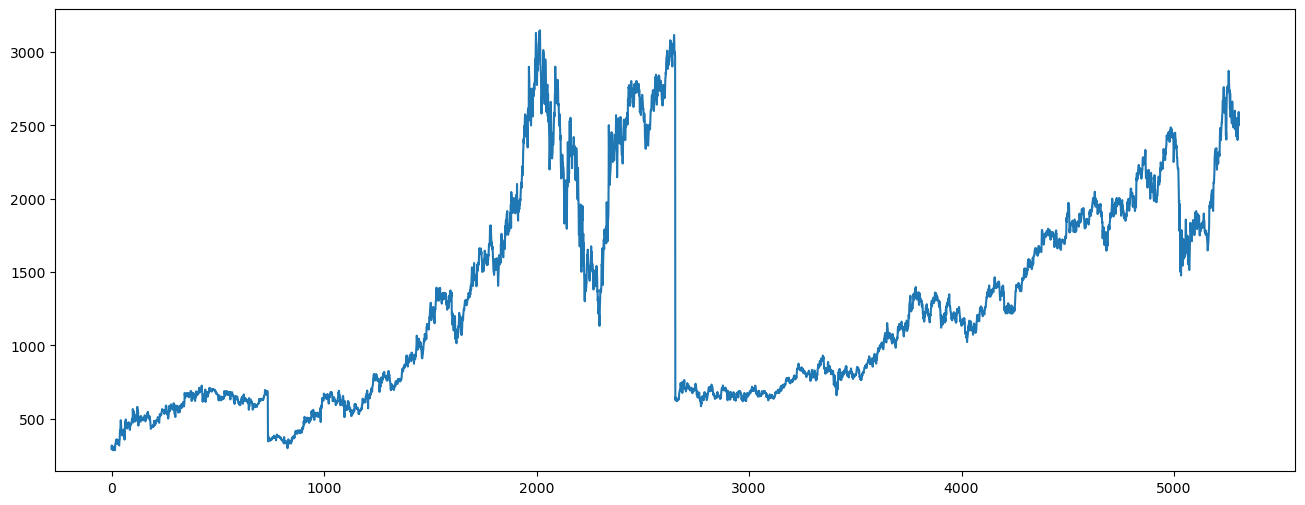

In [161]:
data['Open'].plot(figsize=(16,6))

In [164]:
x = data[['Open','High','Low','Volume']]
y = data['Prev Close']

In [165]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=0)

In [166]:
x_train.shape

(3979, 4)

In [167]:
x_test.shape

(1327, 4)

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [169]:
regressor.fit(x_train,y_train)

LinearRegression()

In [170]:
print(regressor.coef_)

[ 8.98753257e-01  1.06640036e-01 -9.12124752e-03  1.94420331e-07]


In [171]:
print(regressor.intercept_)

1.7145844297772328


In [172]:
predicted = regressor.predict(x_test)

In [173]:
print(x_test)

         Open    High      Low   Volume
3655  1065.10  1076.5  1042.15  3614598
29     354.00   369.0   345.00  1457178
5135  1814.95  1849.0  1811.00  3816127
3671  1026.50  1040.7  1012.75  2644331
4681  1683.90  1689.7  1649.45  4632839
...       ...     ...      ...      ...
4198  1335.55  1362.1  1310.00  4422950
4330  1521.70  1537.2  1503.45  1408855
2048  2595.00  2716.5  2595.00   403259
4058  1130.00  1139.4  1093.45  3916572
4722  1970.00  1982.0  1943.05  1829220

[1327 rows x 4 columns]


In [174]:
predicted.shape

(1327,)

In [175]:
dframe=pd.DataFrame(y_test,predicted)

In [176]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price': predicted})

In [177]:
print(dfr)

      Actual Price  Predicted Price
3655       1064.40      1064.971720
29          343.65       356.359885
5135       1804.05      1814.307588
3671       1034.10      1026.541656
4681       1660.25      1681.170539
...            ...              ...
4198       1391.35      1336.209967
4330       1519.85      1519.835049
2048       2580.55      2600.075708
4058       1114.95      1129.599255
4722       1981.70      1966.251649

[1327 rows x 2 columns]


In [178]:
dfr.head(25)

,Actual Price,Predicted Price
3655,1064.40,1064.971720
29,343.65,356.359885
5135,1804.05,1814.307588
3671,1034.10,1026.541656
4681,1660.25,1681.170539
2137,2096.55,2074.320084
4351,1631.50,1629.014485
4664,1718.70,1731.493350
5304,2577.00,2588.024616
398,680.75,685.377572


In [179]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [180]:
regressor.score(x_test,y_test)

0.9995933897477597

In [181]:
import math

In [182]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 8.581182999577496


In [183]:
print('Mean Squared Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Squared Error: 8.581182999577496


In [184]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 14.220780857525604


In [185]:
graph=dfr.head(20)

<AxesSubplot:>

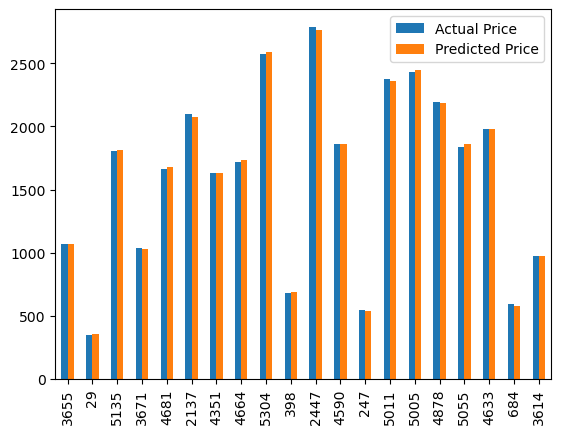

In [186]:
graph.plot(kind='bar')